# Time Series vs Regression Techniques

You can use linear regression for time series data provided that the <b>assumptions of linear regression are fulfilled </b> which is most likely not the case with real world time series data. (Source: https://www.quora.com/Why-cant-you-use-linear-regression-for-time-series-data)

<b>Regression is an interpolation technique while time series is extrapolation.</b> 

You can extrapolate with linear regression as well but the main problem is that it is unlikely to hold in the long run, since that would imply that sales keep growing at a steady pace, no matter what happens. You are extrapolating from limited data, which is rarely a good thing to do.

The image below helps understand it better:
(source:https://stats.stackexchange.com/questions/219579/what-is-wrong-with-extrapolation)

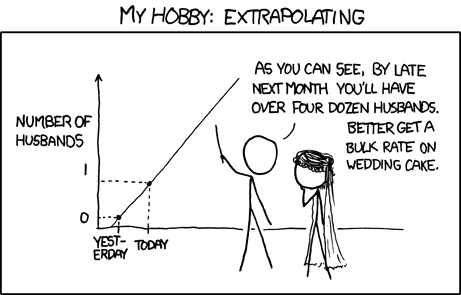


Source for below paragraph(https://www.quora.com/What-is-diffrence-between-prediction-of-time-series-analysis-and-regression-analysis):

Moreover, <b>time series analysis is used when you don't have the faintest idea of what affects your target variable or when too many variables affect your target and most of them are hard to collect.</b> Stocks are the best example for this. There are at least 10 variables that affect the stock price and yet each one of them maybe in turn dependent on other variables. That's the reason we 'forecast' using date or time as our independent variable.

In <b>regression analysis you have strong evidence that a set of variables are only going to affect your target.</b> And these set of variables are not so hard to collect. Say the thickness of a sheet that is manufactured, it depends on the mechanical and thermal properties of the machines used which are not hard to collect.

# New Approach: Time Series

We tried applying regression techniques like ridge regression, decision trees, xgboostregressor and random forests to forecast future cases but it was overfitting the data very badly despite of hyperparameter optimization.

We will now use Time Series Anaysis to solve the same problem.

Source: https://www.quora.com/Can-I-apply-both-time-series-analysis-and-regression-analysis-for-the-same-annual-time-series-data

# Prophet

Prophet models time series as a generalized additive model (GAM) combining the trend function, seasonality function, holiday effects, and an error term in one model.

<b> What's a GAM? </b>

Source:https://datascienceplus.com/generalized-additive-models/

This is a high level explanation:

GAMs are simply a class of statistical Models in which the usual Linear relationship between the Response and Predictors are replaced by several Non linear smooth functions to model and capture the Non linearities in the data.

The Regression Function F(x) gets modified in Generalized Additive Models , and only due to this transformation the GAMs are better in terms of Generalization to random unseen data , fits the data very smoothly and flexibly without adding Complexities or much variance to the Model most of the times.

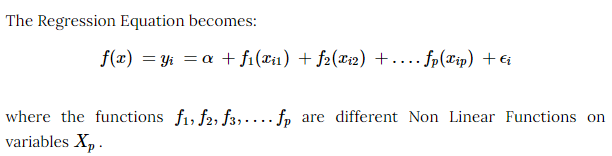

The terms f1(x1),…,fp(xp) denote smooth, nonparametric functions. Note that, in the context of regression models, the terminology nonparametric means that the shape of predictor functions are fully determined by the data as opposed to parametric functions that are defined by a typically small set of parameters. This can allow for more flexible estimation of the underlying predictive patterns without knowing upfront what these patterns look like.

<b>Hence, when your model contains nonlinear effects, GAM provides a regularized and interpretable solution – while other methods generally lack at least one of these three features. In other words, GAMs strike a nice balance between the interpretable, yet biased, linear model, and the extremely flexible, “black box” learning algorithms.</b>

<b> ARIMA or Prophet </b>

Generally, ARIMA with fine tuned parameters will produce better results that Prophet with no parameter setting

ARIMA  models  are  capable  of  including  seasonal  covariates,  but  adding  these  covariates  leads  toextremely  long fitting  times  and  requires  modeling  expertise  that  many  forecasting  novices  would  not have.

When a forecast is poor, we wish to be able to tune the parameters of ARIMA to the  problem  at  hand.   Tuning  these  methods  requires  a  thorough  understanding  of  how the underlying time series models work.  The  first input parameters to automated ARIMA, for instance, are the maximum orders of the differencing, the auto-regressive components,and the moving average components.  A typical analyst will not know how to adjust these orders and this is the type of expertise that is hard to scale.

Article: https://blog.exploratory.io/is-prophet-better-than-arima-for-forecasting-time-series-fa9ae08a5851
Paper:https://peerj.com/preprints/3190/

# Math behind Prophet

Sources:

1. https://medium.com/analytics-vidhya/time-series-analysis-using-prophet-in-python-part-1-math-explained-5936509c175c
2. https://medium.com/future-vision/the-math-of-prophet-46864fa9c55a

Paper: https://peerj.com/preprints/3190/

## Introduction 

Prophet models time series as a generalized additive model (GAM) combining the trend function, seasonality function, holiday effects, and an error term in one model:

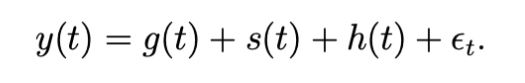

Here:

- g(t) = trend models non-periodic changes (i.e. growth over time)

- s(t) = seasonality presents periodic changes (i.e. weekly, monthly, yearly)

- h(t) = ties in effects of holidays (on potentially irregular schedules ≥ 1 day(s))

- e(t) = covers idiosyncratic changes not accommodated by the model (basically unexplainable error term)

## Saturating Growths - g(t)
    
Needs carraying capacity(or cap) - basically what is the maximum value of the forecast? This would usually be set using data or expertise about the market size.

Two types:
1. Linear
2. Logisitic


<b>1. Linear: </b>

By default, Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

This trend model is a simple Piecewise Linear Model with a constant rate of growth.
It is best suited for problems without a market cap or other max in sight, and is set via growth='linear'.

<b>2. Logistic:</b>

If the data suggests promise of saturation — i.e. one is wrestling constraints like: cubed footage, processing power, number of people w/ Internet access— setting growth='logistic' is the move.

Let's say the cap is 8.5. You can see in the below graph that the graph stops at 8.5(max)
<img src="https://facebook.github.io/prophet/static/saturating_forecasts_files/saturating_forecasts_13_0.png" width="500">

You can represent this using the following equation:
<img src="https://miro.medium.com/max/282/1*Y7bCUzRTaKsdPc1JGgdb2A.png" width=300>

where:

- C is the carrying capacity (max value)

- k is the growth rate

- m is an offset parameter (The offset parameter m is the x0 of the sigmoid function i.e. the value of the midpoint of the sigmoid function where the slope switches from increasing to decreasing - Source https://github.com/facebook/prophet/issues/452)



The problem with the above equation is that it's too simple to accomodate the growth rate and the carrying capacity which changes over time (carrying capacity or max value is not constant over time and keeps changing. Same for growth rate - Advances like those seen over the past decade in handheld devices, app development, and global connectivity, virtually ensure that growth rate is not constant.)

For carrying capacity, just change C to C(t) ( a function of time).

But changing growth rate is not that simple because this rate can quickly change due to new products so the model must be able to incorporate a varying rate in order to fit historical data.

We do this by defining changepoints. Suppose there are S changepoints at times sj, j = 1,…,S.

With 𝛿𝑗 change in growth rate at time 𝑠𝑗, growth rate becomes:
<img src="https://miro.medium.com/max/226/1*mvd9nhmbWBXfC1noGwl6ug.png" width=200>

where δj is the change in rate that occurs at time sj

You can vectorize the above equation by creating a vector a(t):
<img src="https://miro.medium.com/max/458/1*WTqHnNEXS-d74OfDmqBQgg.png" width=250>

and now your new growth rate is:
<img src="https://miro.medium.com/max/170/1*47O7r8586hA6YRSWG65qhQ.png" width=100>

So the rate at any time t is then the base rate k, plus adjustments up to that time.

We also need to change the offset parameter(m) by introducing 𝛾 (calculated based on other parameters)

Final logistic trend model can be re-written as:
<img src="https://miro.medium.com/max/700/1*iTqGbBAu4GBD9Mu3aG_xrA.png" width=500>

<b> Parameters: </b>

1. 𝑐(𝑡) user defined: Analysts often have insight into market sizes and can set these accordingly. There may also be external data sources that can provide carrying capacities,such as population forecasts from the World Bank.

2. Prior 𝑚∼𝑁(0,5)

3. 𝑠𝑗 automatically selected by the model

4. Prior δ𝑗∼𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0,𝜏)

5. 𝜏 regularizes trend flexibility

6. 𝛾 calculated based on other parameters

## Seasonality - s(t) 

The seasonal component s(t) provides a adaptability to the model by allowing periodic changes based on sub-daily, daily, weekly and yearly seasonality.

Prophet relies on Fourier series to provide a malleable model of periodic effects. P is the regular period the time series will have (e.g. P = 365.25 for yearly data or P = 7 for weekly data, when time is scaled in days).

<img src="https://miro.medium.com/max/467/1*2z00wWtz57_pIXO2LDkzSQ.png" width=400> 

where:
- N: order of Fourier series

- P: period

<b>Parameters</b>
1. For yearly seasonality, default N=10, P=365.25

2. For weekly seasonality, default N=3, P=7

3. Prior 𝛽∼𝑁(0,𝜎^2)

Note: The choice of these parameters could be automated using a model selection procedure such as AIC.

Fitting seasonality requires estimating the 2N parameters because β=[a1,b1,…,aN,bN]ᵀ.In the equation for s(t), aN and bN are the parameters.Since we need to estimate 1 to N parameters for "a" and "b", the total number of parameter is 2N. This is done by constructing a matrix of seasonality vectors for each value of t in our historical and future data, for example with yearly seasonality(P=365.25) and N= 10:

<img src = "https://miro.medium.com/max/448/1*ZCT96YpA5XncvnlAXXw-mw.png" width=400>

and now we can rewrite our sesonal function s(t) as :

<img src= "https://miro.medium.com/max/700/1*33cGEwOi7YMYRDbSVFi2gw.png" width=500>

where X(t) is already defined above and β are the 2N parameters.

## Holidays - h(t) 

To utilize this feature, the user needs to provide a custom list of events.

For each holiday i, let Di be the set of past and future dates for that holiday. Then add an indicator function representing whether time t is during holiday i, and assign each holiday a parameter κi which is the corresponding change in the forecast.

This is done in a similar way as seasonality by generating a matrix of regressors:
<img src="https://miro.medium.com/max/343/1*aNlszxseeC5VzWAGYdV3-Q.png" width=300>

so basically: for each holiday i (like christmas) does time t (like 2018) belong to Di(i.e belong to the past/future dates)? If yes, then mark 1 else nothing.

and we can write our final h(t) as :
<img src="https://miro.medium.com/max/700/1*P8nB0hOrWoCJJ4ko1JdMhg.png" width=500>

<b> Parameters </b>

1. Prior 𝜅∼𝑁(0,𝜈^2)∼ default 𝑁(0,0.5)

2. User defined dataframe with 2 columns - name of holiday and date(past+future dates)

## Fitting the model 

Now we are going infer the parameters of our model by doing a Maximum A Posteriori (MAP) estimation.

X|𝑚,𝛿,𝛽,𝜅,𝜖,∼𝑁(𝑔(𝑡)+𝑠(𝑡)+ℎ(𝑡),𝜖)

Then based on the priors of the parameters and the data, we can find maximum a posterior (MAP) estimates for all parameters.


<b>Bayes Theorem</b>

P(A | B) = (P(B | A) * P(A)) / P(B)

The quantity that we are calculating is typically referred to as the posterior probability of A given B and P(A) is referred to as the prior probability of A.


<b> Optimization equation </b>

P((𝑚,𝛿,𝛽,𝜅,𝜖)/X) = P(X/𝑚,𝛿,𝛽,𝜅,𝜖) * P(𝑚,𝛿,𝛽,𝜅,𝜖)

We want parameters (𝑚,𝛿,𝛽,𝜅,𝜖) that best explains the observed training dataset (X) and that the prior (P(𝑚,𝛿,𝛽,𝜅,𝜖)) is our belief about how useful a parameter set is expected to be, generally, regardless of the training data. The optimization problem involves estimating the posterior probability (i.e. P((𝑚,𝛿,𝛽,𝜅,𝜖)/y) ) for each candidate parameter set.

Maximizing P((𝑚,𝛿,𝛽,𝜅,𝜖)/X) over a range of parameters(𝑚,𝛿,𝛽,𝜅,𝜖) solves an optimization problem for estimating the central tendency(mean,median,mode - generally mode) of the posterior probability.

Bayesian methods can be used to determine the most probable parameters given the data-the maximum a posteriori (MAP) hypothesis. This is the optimal parameter in the sense that no other parameter is more likely.

maximize P(X/𝑚,𝛿,𝛽,𝜅,𝜖) * P(𝑚,𝛿,𝛽,𝜅,𝜖)

Read more on MAP: https://machinelearningmastery.com/maximum-a-posteriori-estimation/  